In [3]:
import os
import tarfile
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
%matplotlib inline 

In [4]:

dataset_path = os.path.join("dataset")
download_url="https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"

In [5]:
def fetch_data(download_url= download_url, dataset_path= dataset_path):
    os.makedirs(dataset_path, exist_ok= True)
    tgz_path = os.path.join(dataset_path,"housing.tgz")
    urllib.request.urlretrieve(download_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path= dataset_path)
    housing_tgz.close()

In [6]:
fetch_data()

In [7]:
def load_data(dataset_path= dataset_path):
    csv_path = os.path.join(dataset_path, "housing.csv")
    return pd.read_csv(csv_path)

In [8]:
df = load_data()

In [9]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
df = df.drop_duplicates() 
df.duplicated().values.any()


False

In [11]:
pd.isnull(df).any  # Checking for Null Values

<bound method DataFrame.any of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0          False     False               False        False           False   
1          False     False               False        False           False   
2          False     False               False        False           False   
3          False     False               False        False           False   
4          False     False               False        False           False   
...          ...       ...                 ...          ...             ...   
20635      False     False               False        False           False   
20636      False     False               False        False           False   
20637      False     False               False        False           False   
20638      False     False               False        False           False   
20639      False     False               False        False           False   

       population  h

In [39]:
df['avgRooms'] = df['total_rooms'] / df['households']
df['avgBedrooms'] = df['total_bedrooms'] / df['households']

In [40]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avgRooms,avgBedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081


In [41]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avgRooms,avgBedrooms
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,1.133333
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,1.315789
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,1.120092
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,1.171920
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,5.254717,1.162264


In [42]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avgRooms,avgBedrooms
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,1.097062
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.476104
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.333333
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,1.006029
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,1.048889
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,1.099631
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,34.066667


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  avgRooms            20640 non-null  float64
 11  avgBedrooms         20433 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.7+ MB


In [44]:
df.shape

(20640, 12)

In [45]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'avgRooms', 'avgBedrooms'],
      dtype='object')

### Data Visualization

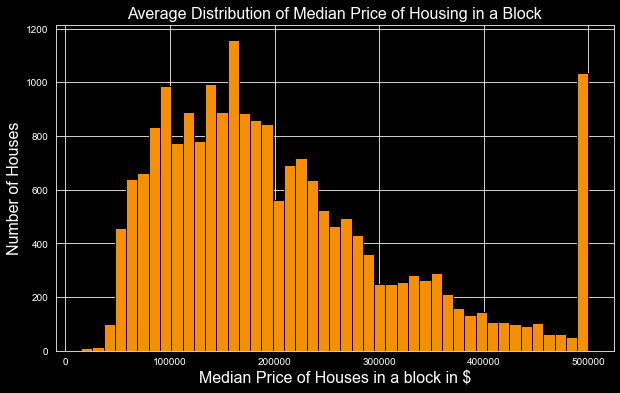

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(df.median_house_value, bins = 45, ec = 'black', color = '#f88f01')
plt.xlabel('Median Price of Houses in a block in $', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Median Price of Housing in a Block', fontsize=16)
plt.show()
plt.style.use('dark_background')

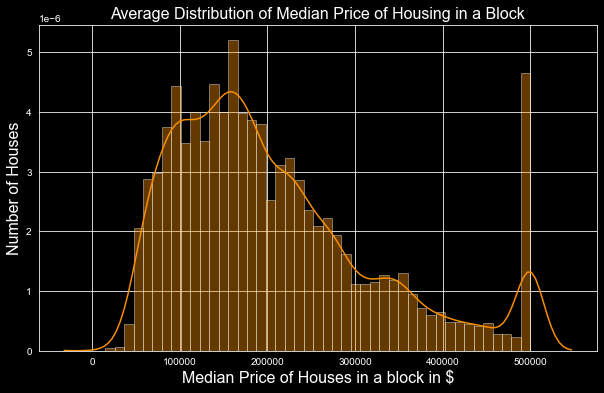

In [47]:
plt.figure(figsize=(10, 6))
sns.distplot(df.median_house_value, bins = 45, color = '#f88f01', hist = True)
plt.style.use('dark_background')
plt.xlabel('Median Price of Houses in a block in $', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Median Price of Housing in a Block', fontsize=16)
plt.show()

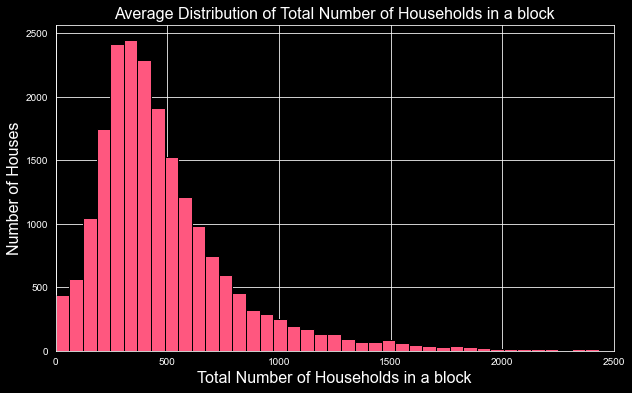

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(df.households , bins=100, ec = 'black', color = '#ff577f')
plt.xlabel('Total Number of Households in a block', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Total Number of Households in a block', fontsize=16)
plt.xlim(0,2500)
plt.show()
plt.style.use('dark_background')

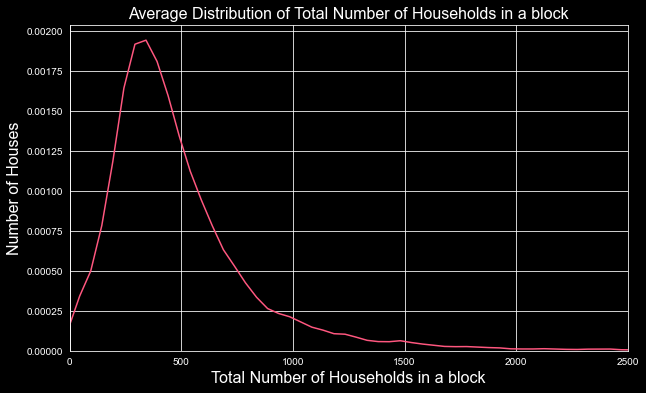

In [61]:
plt.figure(figsize=(10, 6))
sns.distplot(df.households , bins=100, color = '#ff577f', hist = False)
plt.xlabel('Total Number of Households in a block', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Total Number of Households in a block', fontsize=16)
plt.xlim(0,2500)

plt.show()
plt.style.use('dark_background')

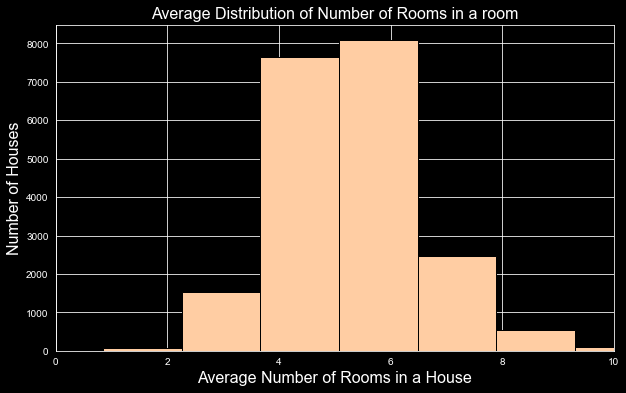

In [59]:
plt.figure(figsize=(10, 6))
plt.hist(df.avgRooms, bins=100, ec = 'black', color = '#ffcda3')
plt.xlabel('Average Number of Rooms in a House', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Number of Rooms in a room', fontsize=16)
plt.xlim(0, 10)
plt.show()
plt.style.use('dark_background')

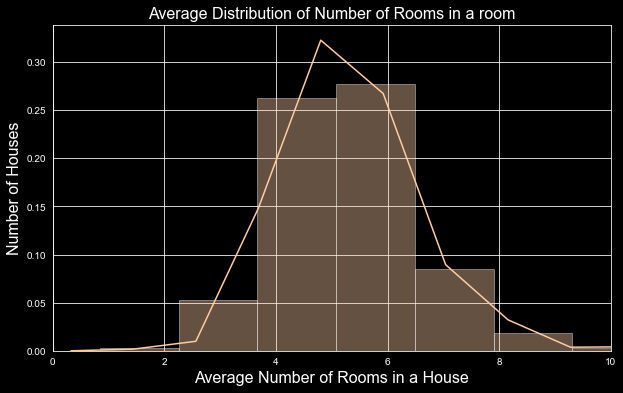

In [62]:
plt.figure(figsize=(10, 6))
sns.distplot(df.avgRooms, bins=100, color = '#ffcda3')
plt.xlabel('Average Number of Rooms in a House', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Number of Rooms in a room', fontsize=16)
plt.xlim(0, 10)
plt.show()
plt.style.use('dark_background')

In [63]:
df.avgRooms.mean()

5.428999742190365

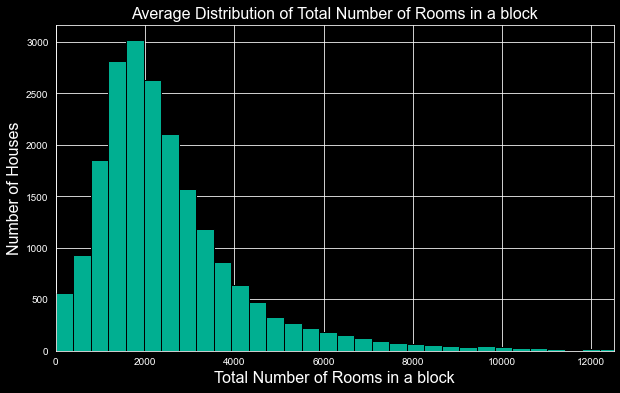

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(df.total_rooms, bins=100, ec = 'black', color = '#00af91')
plt.xlabel('Total Number of Rooms in a block', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Total Number of Rooms in a block', fontsize=16)
plt.xlim(0, 12500)
plt.show()
plt.style.use('dark_background')

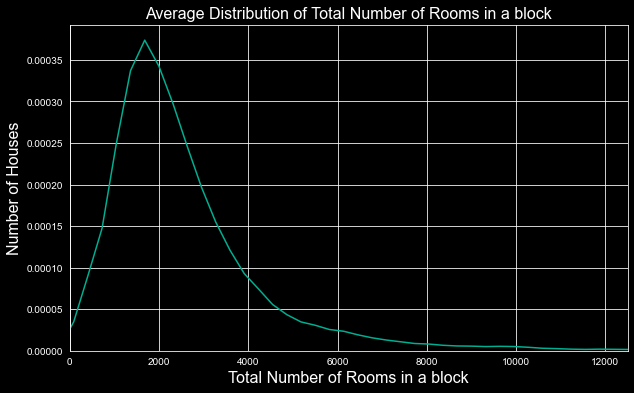

In [51]:
plt.figure(figsize=(10, 6))
sns.distplot(df.total_rooms, bins = 45, color = '#00af91', hist = False)
plt.xlabel('Total Number of Rooms in a block', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Total Number of Rooms in a block', fontsize=16)
plt.xlim(0, 12500)

plt.show()
plt.style.use('dark_background')

In [52]:
df.total_rooms.mean()

2635.7630813953488

## Ocean Proximity

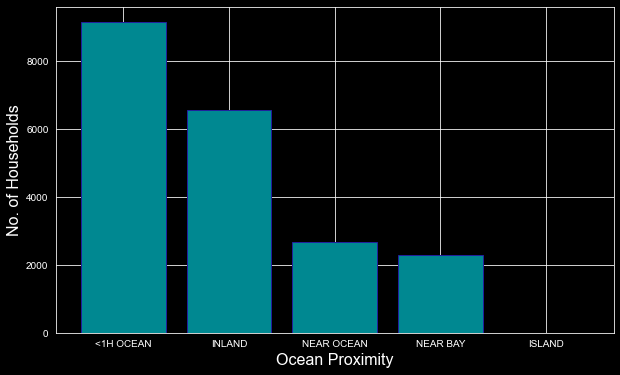

In [70]:
freq = df.ocean_proximity.value_counts()
plt.figure(figsize=(10, 6))
plt.bar(freq.index, height = freq,ec='#21209c',color='#008891')
plt.xlabel('Ocean Proximity', fontsize=16)
plt.ylabel('No. of Households', fontsize=16)
plt.show()

### Correlation
### $$ \rho _{XY} = corr(X,Y)$$
### $$ -1.0 \leq \rho _{XY} \leq +1.0$$

In [64]:
df.median_house_value.corr(df.avgRooms)

0.1519482897414578